<style>
div.prompt { display:none; }
</style>

# <p style="text-align: center;">Assignment 11.2</p>
### **Course**: DSC 530
### **Professor**: Fadi Alsaleem
### **Student**: Ramkumar Perumalagaram Subramanian
### **Date**: 03/01/2025

# Aircraft Crashes and Fatalities

## Statistical Questions

### Descriptive Statistics:
1. How has the frequency of airplane crashes changed over time?
2. What percentage of crashes had no fatalities?
3. What is the average number of fatalities per crash?
4. Which airlines have the highest number of crashes?

### Geographical Analysis:
1. Which countries have the highest number of airplane crashes?
2. Is there a correlation between a country's air traffic volume and the number of crashes?

### Hypothesis Testing:
1. *H0:* The number of airplane crashes has remained constant over decades | *H1:* The number of airplane crashes has decreased over time.
2. *H0:* The survival rate of airplane crashes is independent of the decade in which the crash occurred. | *H1:* The survival rate of airplane crashes has improved in recent decades.
3. *H0:* There is no significant difference in the number of crashes between different airlines. | *H1:* Certain airlines have a significantly higher crash rate than others.
4. *H0:* Airplane crashes are evenly distributed across all countries. | *H1:* Certain countries have significantly higher crash frequencies.
5. *H0:* Crashes are equally likely to occur in all months of the year. | *H1:* Certain months or seasons have higher crash rates.


## Initial Data Analysis

In [11]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
file_path = "/Users/ramkumarsubramanian/Library/Mobile Documents/com~apple~CloudDocs/Data Science/DSC 530/Week 12/Airplane_Crashes_and_Fatalities_Since_1908.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df_info = df.info()

# Display summary statistics of numerical columns
df_describe = df.describe()

# Check for missing values
missing_values = df.isnull().sum()

# Display unique values in categorical columns to identify inconsistencies
categorical_columns = ["Location", "Operator", "Type", "Route", "Registration"]
unique_values = {col: df[col].nunique() for col in categorical_columns if col in df.columns}

df_info,df_describe,missing_values,unique_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         5268 non-null   int64  
 1   Date          5268 non-null   object 
 2   Time          3049 non-null   object 
 3   Location      5248 non-null   object 
 4   Operator      5250 non-null   object 
 5   Flight #      1069 non-null   object 
 6   Route         3561 non-null   object 
 7   Type          5241 non-null   object 
 8   Registration  4933 non-null   object 
 9   cn/In         4040 non-null   object 
 10  Aboard        5246 non-null   float64
 11  Fatalities    5256 non-null   float64
 12  Ground        5246 non-null   float64
 13  Summary       4878 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 576.3+ KB


(None,
             index       Aboard   Fatalities       Ground
 count  5268.00000  5246.000000  5256.000000  5246.000000
 mean   2633.50000    27.554518    20.068303     1.608845
 std    1520.88494    43.076711    33.199952    53.987827
 min       0.00000     0.000000     0.000000     0.000000
 25%    1316.75000     5.000000     3.000000     0.000000
 50%    2633.50000    13.000000     9.000000     0.000000
 75%    3950.25000    30.000000    23.000000     0.000000
 max    5267.00000   644.000000   583.000000  2750.000000,
 index              0
 Date               0
 Time            2219
 Location          20
 Operator          18
 Flight #        4199
 Route           1707
 Type              27
 Registration     335
 cn/In           1228
 Aboard            22
 Fatalities        12
 Ground            22
 Summary          390
 dtype: int64,
 {'Location': 4303,
  'Operator': 2476,
  'Type': 2446,
  'Route': 3243,
  'Registration': 4905})

### 1. Missing Values:
- Following columns has a significant number of missing values:
    - Time (2219)
    - Flight # (4199)
    - Route (1707)
    - cn/In (1228)
- Other columns such as Location, Operator, Type, Aboard, Summary has less number of missing values

### 2. Data Type Issues:
- Date is stored as an object (string) instead of DateTime format
- Columns such as Aboard, Fatalities and Ground are stored as floats. This can be converted into integers

### 3. Categorical Inconsistencies:
- Operator has 2476 unique values that might need standardization by checking the variation in spellings
- Location has 4303 unique values that might need standardization by extracting the country names
        

## Data Cleaning

Following steps are performed for cleaning the dataset:

1. Convert the Date column to a proper DateTime format
2. Handle missing values appropriately:
   - Time can be dropped since it has a lot of missing data
   - Extract missing values in Location and standardize country names
   - Investigate whether missing Operator or Type values can be inferred
3. Convert numerical columns (Aboard, Fatalities and Ground) to integers if no missing values remain
4. Standardize Operator values for consistency
5. Drop unnecessary columns like Flight #, cn/In, and Registration as they will not be useful for analysis

In [12]:
# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop 'Time' column since it has too many missing values and is not critical for analysis
df.drop(columns=['Time'], inplace=True)

# Standardizing 'Location' column by extracting country. 
df['Country'] = df['Location'].apply(lambda x: x.split(',')[-1].strip() if pd.notnull(x) else None)

# For USA, the Location dataset is listed as City, State whereas for other countries, the Location dataset is listed as City, Country
# Define US states that might be mistakenly classified as countries
usa_states = ['Alaska', 'California', 'New York', 'Texas', 'Florida', 'Hawaii', 'Illinois', 
              'Washington', 'Nevada', 'Colorado', 'Georgia', 'Oregon', 'Arizona', 'Michigan', 
              'Pennsylvania', 'Ohio', 'New Jersey', 'North Carolina', 'Virginia', 'Tennessee']

# Standardizing location names to ensure all US states are categorized under 'USA'
df['Country'] = df['Country'].apply(lambda x: 'USA' if x in usa_states else x)

# Filling missing values in 'Operator' with 'Unknown'
df['Operator'].fillna('Unknown', inplace=True)

# Filling missing values in 'Type' with 'Unknown'
df['Type'].fillna('Unknown', inplace=True)

# Dropping unnecessary columns: 'Flight #', 'cn/In', and 'Registration'
df.drop(columns=['Flight #', 'cn/In', 'Registration'], inplace=True)

# Convert numerical columns to integers after handling missing values
df[['Aboard', 'Fatalities', 'Ground']] = df[['Aboard', 'Fatalities', 'Ground']].fillna(0).astype(int)

# Step 4: Standardize categorical data (removing leading/trailing spaces, converting to uppercase for consistency)
df['Operator'] = df['Operator'].str.strip().str.upper()
df['Type'] = df['Type'].str.strip().str.upper()

# Display cleaned dataset overview
print("Airplane Crashes Dataset - Cleaned:")
print(df.head())

Airplane Crashes Dataset - Cleaned:
   index       Date                            Location  \
0      0 1908-09-17                 Fort Myer, Virginia   
1      1 1912-07-12             AtlantiCity, New Jersey   
2      2 1913-08-06  Victoria, British Columbia, Canada   
3      3 1913-09-09                  Over the North Sea   
4      4 1913-10-17          Near Johannisthal, Germany   

                 Operator          Route                    Type  Aboard  \
0    MILITARY - U.S. ARMY  Demonstration        WRIGHT FLYER III       2   
1    MILITARY - U.S. NAVY    Test flight               DIRIGIBLE       5   
2                 PRIVATE            NaN        CURTISS SEAPLANE       1   
3  MILITARY - GERMAN NAVY            NaN  ZEPPELIN L-1 (AIRSHIP)      20   
4  MILITARY - GERMAN NAVY            NaN  ZEPPELIN L-2 (AIRSHIP)      30   

   Fatalities  Ground                                            Summary  \
0           1       0  During a demonstration flight, a U.S. Army fly...   


## Variables taken into consideration

The following variables have been selected for the exploratory data analysis (EDA) on airplane crashes and fatalities:

1. **Date** – The date of the crash, used for analyzing trends over time, such as changes in crash frequency, survival rates across decades, and seasonal variations

2. **Location (Country)** – The geographical location of the crash. This is crucial for identifying which countries have the highest number of crashes and exploring potential correlations with air traffic volume

3. **Operator** – The airline or entity operating the aircraft. This helps determine which airlines have the highest number of crashes and whether certain operators have significantly different crash rates

4. **Aboard** – The total number of people on board the aircraft. This is important for calculating survival rates and understanding the severity of crashes

5. **Fatalities** – The number of fatalities in the crash. This allows for analyzing crash severity, computing survival rates, and assessing whether fatality rates have changed over time

6. **Ground** – The number of people killed on the ground. This helps understand the overall impact of crashes beyond just those on board, particularly for major incidents with high ground casualties

7. **Type** – The type of aircraft involved in the crash. This provides insight into whether certain aircraft models/types are more prone to crashes, helping identify trends in aviation safety

These variables will be used to answer key statistical questions related to airplane crashes and fatalities, focusing on temporal trends, geographical distribution, airline safety, and crash severity


## Histogram representation for each variable

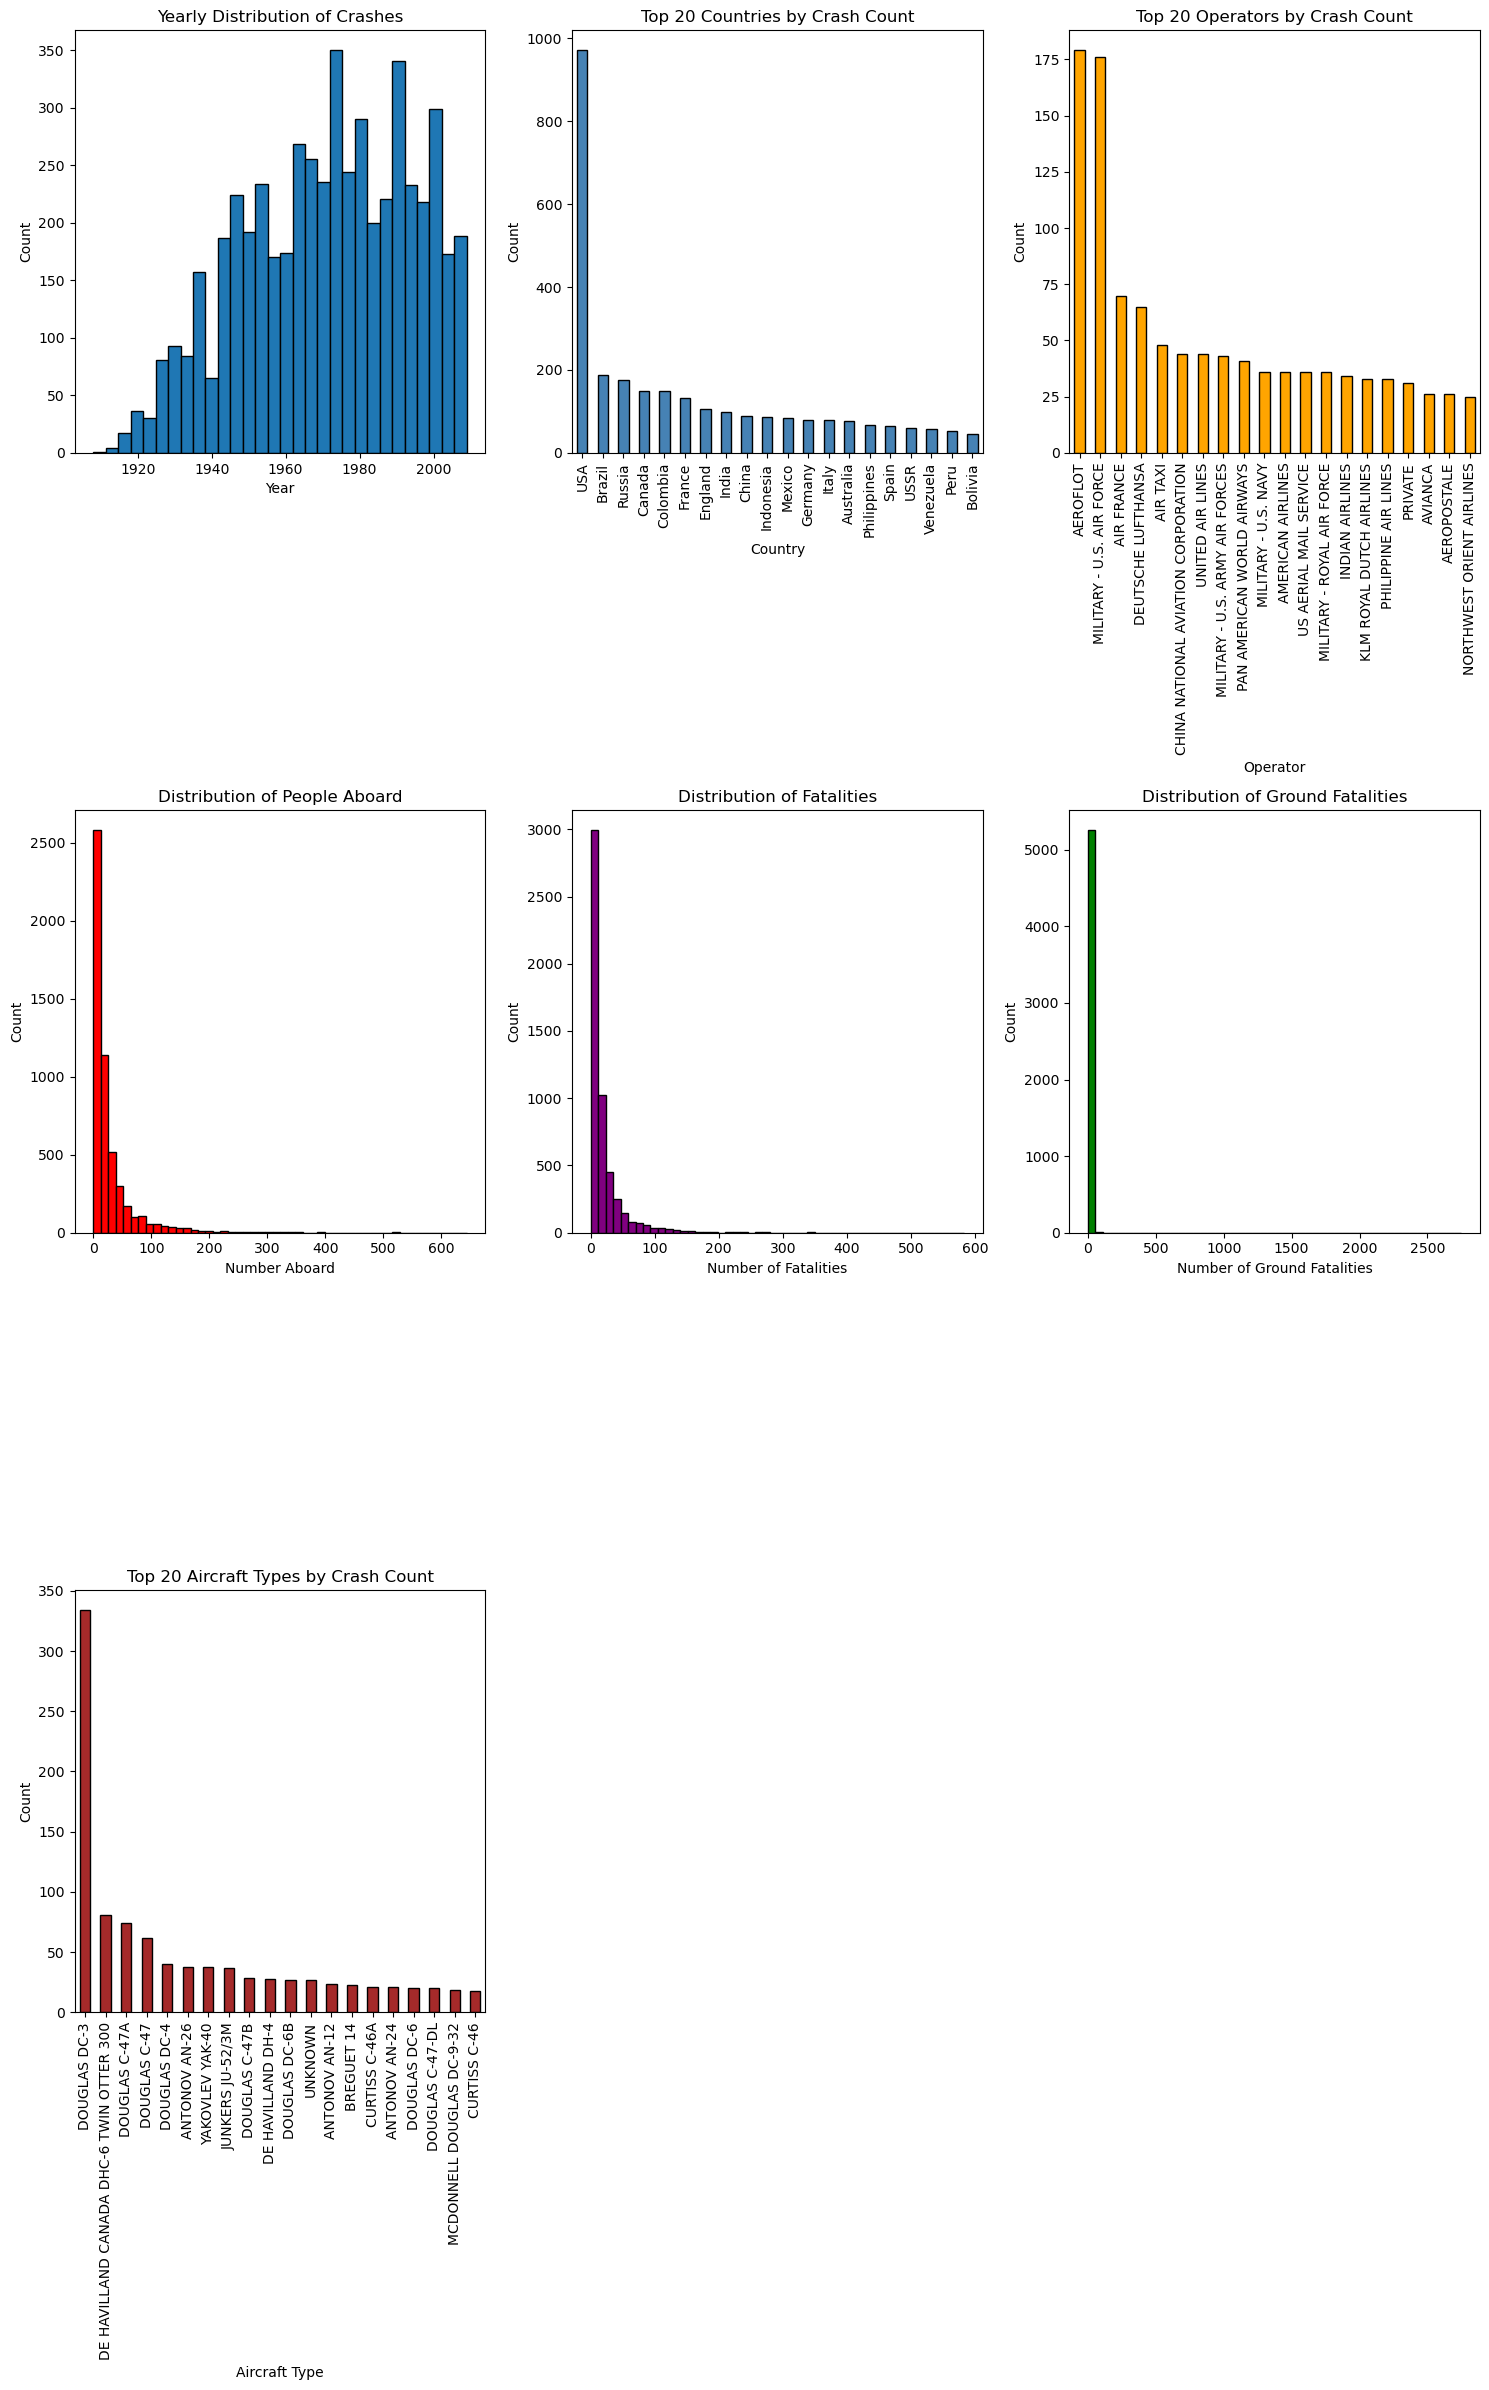

<Figure size 640x480 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt

# Set up the figure and axes for the histograms
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# Histogram for Date (Yearly Distribution)
df['Year'] = df['Date'].dt.year
axes[0, 0].hist(df['Year'].dropna(), bins=30, edgecolor='black')
axes[0, 0].set_title("Yearly Distribution of Crashes")
axes[0, 0].set_xlabel("Year")
axes[0, 0].set_ylabel("Count")

# Histogram for Countries (Top 20 Countries by Crash Count)
df['Country'].value_counts().head(20).plot(kind='bar', ax=axes[0, 1], color='steelblue', edgecolor='black')
axes[0, 1].set_title("Top 20 Countries by Crash Count")
axes[0, 1].set_xlabel("Country")
axes[0, 1].set_ylabel("Count")

# Histogram for Operator (Top 20 Operators by Crash Count)
df['Operator'].value_counts().head(20).plot(kind='bar', ax=axes[0, 2], color='orange', edgecolor='black')
axes[0, 2].set_title("Top 20 Operators by Crash Count")
axes[0, 2].set_xlabel("Operator")
axes[0, 2].set_ylabel("Count")

# Histogram for Aboard
axes[1, 0].hist(df['Aboard'], bins=50, edgecolor='black', color='red')
axes[1, 0].set_title("Distribution of People Aboard")
axes[1, 0].set_xlabel("Number Aboard")
axes[1, 0].set_ylabel("Count")

# Histogram for Fatalities
axes[1, 1].hist(df['Fatalities'], bins=50, edgecolor='black', color='purple')
axes[1, 1].set_title("Distribution of Fatalities")
axes[1, 1].set_xlabel("Number of Fatalities")
axes[1, 1].set_ylabel("Count")

# Histogram for Ground Fatalities
axes[1, 2].hist(df['Ground'], bins=50, edgecolor='black', color='green')
axes[1, 2].set_title("Distribution of Ground Fatalities")
axes[1, 2].set_xlabel("Number of Ground Fatalities")
axes[1, 2].set_ylabel("Count")

# Histogram for Aircraft Type (Top 20 Types)
df['Type'].value_counts().head(20).plot(kind='bar', ax=axes[2, 0], color='brown', edgecolor='black')
axes[2, 0].set_title("Top 20 Aircraft Types by Crash Count")
axes[2, 0].set_xlabel("Aircraft Type")
axes[2, 0].set_ylabel("Count")

# Hide empty subplots
axes[2, 1].axis('off')
axes[2, 2].axis('off')

# Adjust layout for readability
plt.tight_layout(rect=[0, 0, 1, 2])

# Display the histograms
plt.show()
plt.savefig("Histogram_Key_Variables.png")

### Summary and Outlier Analysis

#### 1. Yearly Distribution of Crashes
- The number of crashes increased significantly from the early 20th century, peaking in the 1970s and 1980s, followed by a declin
- **Possible Outliers:** The early years (before 1920) have very few recorded crashes, likely due to the infancy of aviation
- **Handling:** Retain all data, as early crashes provide historical context

#### 2. Top 20 Countries by Crash Count
- The USA has the highest number of crashes, significantly more than any other country
- **Possible Outliers:** The USA is an outlier due to its dominant share of aviation traffic
- **Handling:** Retain, as this reflects real-world aviation trends

#### 3. Top 20 Operators by Crash Count
- Certain operators (e.g., Aeroflot, U.S. Air Force) have a much higher number of crashes
- **Possible Outliers:** Military and early-era airlines have significantly more crashes
- **Handling:** Retain, but separate military and commercial airlines in further analysis

#### 4. Distribution of People Aboard
- Most flights had fewer than 100 people aboard, but a few had over 500
- **Possible Outliers:** High-capacity commercial flights with more than 500 aboard
- **Handling:** Retain, as these represent major airline disasters

#### 5. Distribution of Fatalities
- Most crashes had low fatality counts, but some had over 500 fatalities
- **Possible Outliers:** Major crashes involving large commercial aircraft
- **Handling:** Keep them, as they help understand severe crash incidents

#### 6. Distribution of Ground Fatalities
- The majority of crashes caused no ground fatalities, but a few resulted in extreme casualties (e.g., over 2,500)
- **Possible Outliers:** Large-scale disasters such as 9/11
- **Handling:** Retain, as they provide insight into crashes with significant ground impact

#### 7. Top 20 Aircraft Types by Crash Count
- Certain aircraft models (e.g., Douglas DC-3) appear more frequently in crash records
- **Possible Outliers:** Aircraft types with disproportionately high crash counts
- **Handling:** Retain, as they may indicate safety concerns with specific aircraft models

## Descriptive Statistics

In [14]:
import numpy as np

# Computing descriptive statistics for the numerical variables
numerical_vars = ['Aboard', 'Fatalities', 'Ground']
descriptive_stats = {}

for var in numerical_vars:
    descriptive_stats[var] = {
        'Mean': np.mean(df[var]),
        'Mode': df[var].mode()[0],
        'Standard Deviation': np.std(df[var]),
        'Min': np.min(df[var]),
        'Max': np.max(df[var]),
        'Skewness': df[var].skew(),
        'Kurtosis': df[var].kurt()
    }

# Convert to DataFrame for easier viewing
descriptive_stats_df = pd.DataFrame(descriptive_stats).T

# Display the descriptive statistics for numerical variables
print("Descriptive Statistics of Numerical Variables:")
print(descriptive_stats_df.head())

Descriptive Statistics of Numerical Variables:
                 Mean  Mode  Standard Deviation  Min     Max   Skewness  \
Aboard      27.439446   2.0           43.019287  0.0   644.0   4.253112   
Fatalities  20.022589   2.0           33.172761  0.0   583.0   4.952818   
Ground       1.602126   0.0           53.869943  0.0  2750.0  50.456150   

               Kurtosis  
Aboard        28.512487  
Fatalities    42.889113  
Ground      2571.785157  


### Descriptive Analysis of Key Numerical Variables

The following statistical measures provide insights into the spread and distribution of key numerical variables in the dataset. Based on the results, we can make some interpretations for each variable

#### **1. People Onboard (Aboard)**
- Most crashes involved a small number of people, but a few extreme cases had over 600 passengers
- The high skewness and kurtosis indicate the presence of extreme outliers, which should be retained for real-world significance

#### **2. Fatalities**
- Most crashes resulted in a small number of fatalities, but there are cases where fatalities exceeded 500
- The high skewness and kurtosis suggest extreme fatality events, which should be examined separately

#### **3. Ground Fatalities**
- The majority of crashes did not result in ground fatalities
- However, a few catastrophic events (e.g., 9/11) significantly impact the distribution
- The extreme right-skewed nature indicates rare but high-impact ground casualty events

#### **Summary of Findings**
- All three variables show highly right-skewed distributions, indicating a large number of low-value occurrences with a few extreme high-value cases
- The **high kurtosis** suggests long-tailed distributions, meaning rare but severe events significantly affect aviation safety tatistics
- However these outliers should be retained for analysis, as they provide critical insights into major aviation disasters

## Probability Mass Function (PMF)

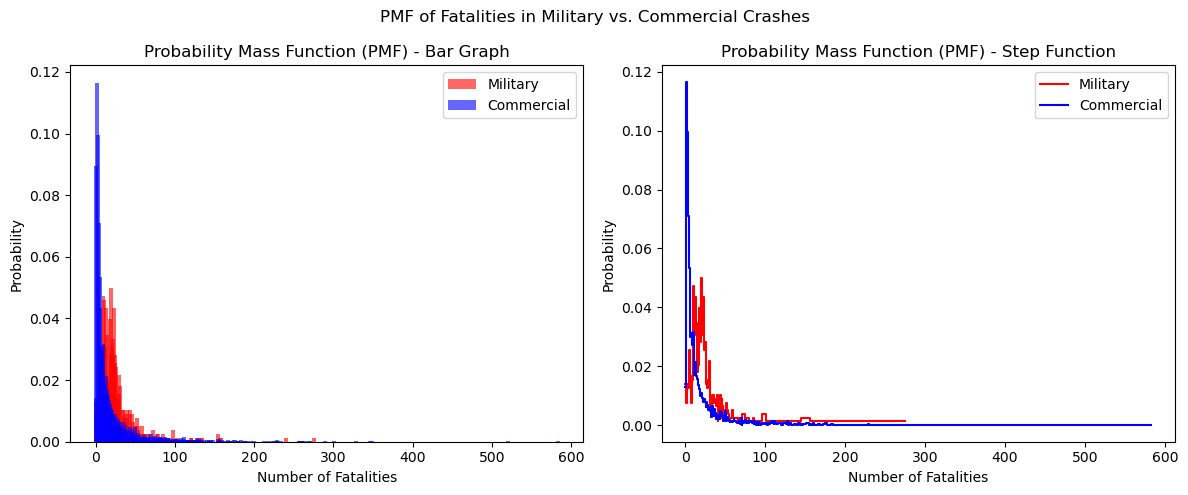

In [15]:
# Ensure 'Operator' column has no missing values before applying string operations
df['Operator'] = df['Operator'].fillna('Unknown')

# Create binary categories for military vs. commercial plane crashes
df['Category'] = df['Operator'].apply(lambda x: 'Military' if isinstance(x, str) and 'MILITARY' in x else 'Commercial')

# Compute PMFs for each category
military_pmf = df[df['Category'] == 'Military']['Fatalities'].value_counts(normalize=True).sort_index()
commercial_pmf = df[df['Category'] == 'Commercial']['Fatalities'].value_counts(normalize=True).sort_index()

# Plot PMFs for comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("PMF of Fatalities in Military vs. Commercial Crashes")

# PMF as bar graphs
axes[0].bar(military_pmf.index, military_pmf.values, alpha=0.6, color='red', label="Military", width=5)
axes[0].bar(commercial_pmf.index, commercial_pmf.values, alpha=0.6, color='blue', label="Commercial", width=5)
axes[0].set_title("Probability Mass Function (PMF) - Bar Graph")
axes[0].set_xlabel("Number of Fatalities")
axes[0].set_ylabel("Probability")
axes[0].legend()

# PMF as step functions
axes[1].step(military_pmf.index, military_pmf.values, color='red', where='mid', label="Military")
axes[1].step(commercial_pmf.index, commercial_pmf.values, color='blue', where='mid', label="Commercial")
axes[1].set_title("Probability Mass Function (PMF) - Step Function")
axes[1].set_xlabel("Number of Fatalities")
axes[1].set_ylabel("Probability")
axes[1].legend()

plt.tight_layout()
plt.show()

### PMF Comparison: Military vs. Commercial Crashes

This analysis compares the distribution of fatalities in **military** and **commercial** airplane crashes. The same variable (**Fatalities**) is used, but the data is segmented into two different scenarios based on the type of operator

1. Most crashes (both military and commercial) have a low number of fatalities
   - The highest probability is concentrated around **zero fatalities**
   - Many incidents have few or no deaths, indicating successful emergency landings or survivable crashes

2. Military crashes tend to have higher fatality probabilities than commercial crashes
   - The probability of crashes resulting in complete fatalities is higher in the **military sector**
   - This could be due to riskier operations, combat-related incidents, and smaller aircraft

3. Commercial crashes have a long-tailed distribution 
   - A few extreme cases (major airline disasters) lead to high fatalities
   - Although rare, these events significantly impact commercial aviation safety

## Cumulative Distribution Function (CDF)

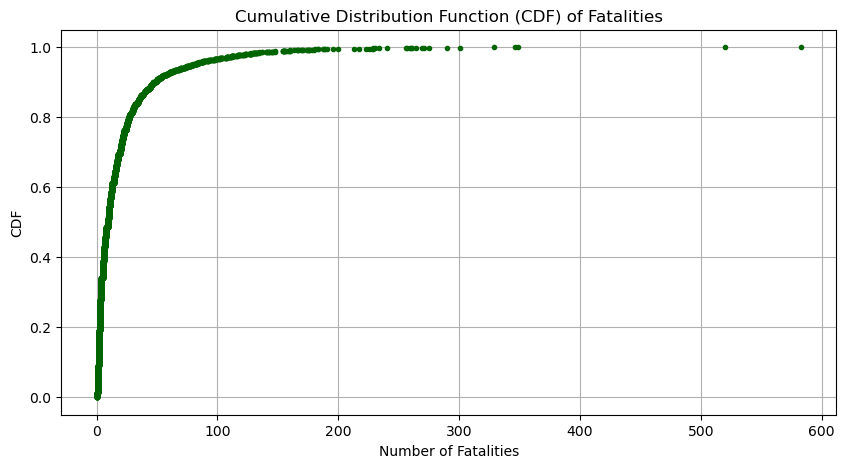

In [16]:
# Compute the CDF for Fatalities
fatalities_sorted = np.sort(df['Fatalities'])
cdf = np.arange(1, len(fatalities_sorted) + 1) / len(fatalities_sorted)

# Plot the CDF
plt.figure(figsize=(10, 5))
plt.plot(fatalities_sorted, cdf, marker='.', linestyle='none', color='darkgreen')
plt.xlabel("Number of Fatalities")
plt.ylabel("CDF")
plt.title("Cumulative Distribution Function (CDF) of Fatalities")
plt.grid(True)
plt.show()

### Cumulative Distribution Function (CDF) of Fatalities

1. Most crashes result in low fatalities
   - The CDF rises steeply near **zero**, indicating that a large percentage of crashes have **low fatalities**
   - More than **80% of crashes have fewer than 50 fatalities**

2. There are rare but extreme fatality events
   - The curve flattens toward the upper tail, suggesting that a small percentage of crashes result in very high fatalities (200-500 deaths)
   - These represent major aviation disasters with **near-total loss of life**

3. **Comparison to Statistical Questions**
   - This analysis helps address the **question of survival rates over time** by providing an understanding of **fatality distributions**
   - The steep rise at **low fatalities** suggests that survival rates **may have improved over time**, supporting the hypothesis that aviation safety has increased

## Analytical Distribution

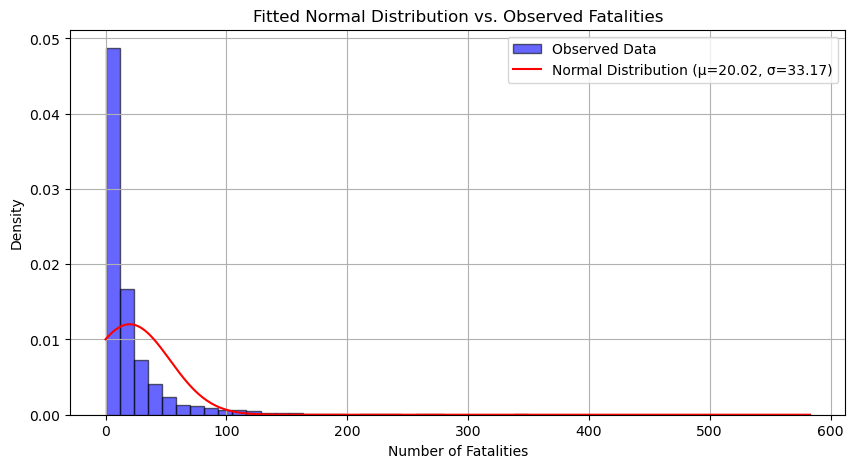

In [17]:
import scipy.stats as stats

# Fit a normal distribution to the fatalities data
mu = np.mean(df['Fatalities'])
sigma = np.std(df['Fatalities'])
x = np.linspace(0, df['Fatalities'].max(), 1000)
pdf = stats.norm.pdf(x, mu, sigma)

# Plot the histogram of fatalities along with the fitted normal distribution
plt.figure(figsize=(10, 5))
plt.hist(df['Fatalities'], bins=50, density=True, alpha=0.6, color='blue', edgecolor='black', label="Observed Data")
plt.plot(x, pdf, 'r', color='red', label=f"Normal Distribution (μ={mu:.2f}, σ={sigma:.2f})")
plt.xlabel("Number of Fatalities")
plt.ylabel("Density")
plt.title("Fitted Normal Distribution vs. Observed Fatalities")
plt.legend()
plt.grid(True)
plt.show()

### **Analytical Distribution: Normal Distribution Fit for Fatalities**

1. Fatalities Do Not Follow a Normal Distribution
   - The histogram is **highly skewed to the right**, meaning most crashes have **low fatalities**, but a few crashes have very high fatalities
   - The **normal distribution assumes symmetry**, which does not hold true for this dataset

2. Mismatch Between Data and the Normal Curve
   - The normal distribution underestimates the peak near zero fatalities and fails to capture the extreme right tail of high-fatality crashes
   - This suggests that fatalities follow a **long-tailed distribution** rather than a symmetric normal distribution

3. Why Normality Assumption Fails
   - A high proportion of crashes have **zero or very few fatalities**, creating a **high peak at the lower end**
   - There are **extreme outliers** (e.g., crashes with 200+ fatalities) that the normal model does not predict well

## Scatter Plots

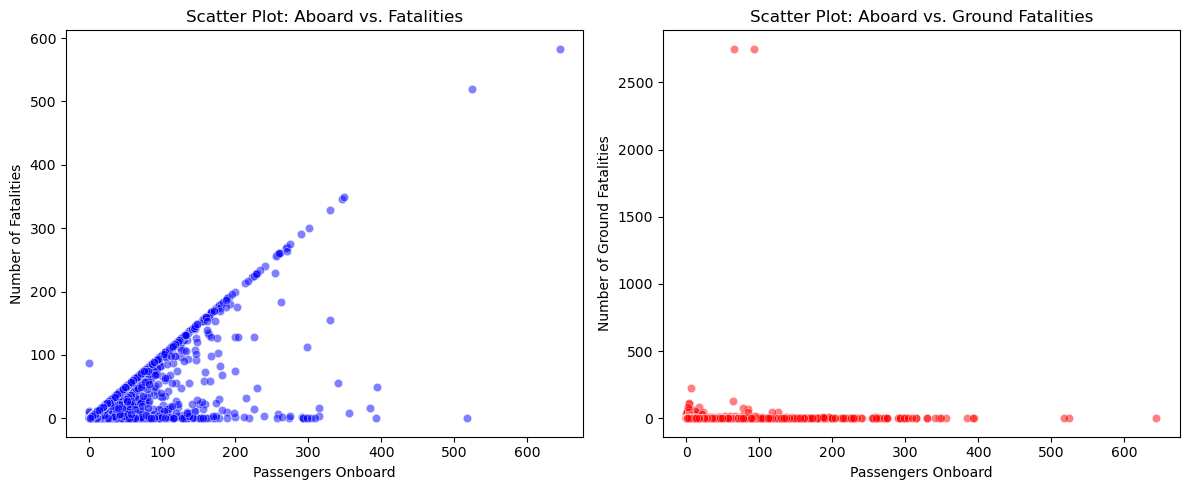

(0.756924228722661,
 1080.3878310158566,
 0.023311016717963238,
 54.03229128688982)

In [18]:
import seaborn as sns

# Scatter plot 1: Aboard vs. Fatalities
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=df['Aboard'], y=df['Fatalities'], alpha=0.5, color='blue')
plt.xlabel("Passengers Onboard")
plt.ylabel("Number of Fatalities")
plt.title("Scatter Plot: Aboard vs. Fatalities")

# Scatter plot 2: Aboard vs. Ground Fatalities
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['Aboard'], y=df['Ground'], alpha=0.5, color='red')
plt.xlabel("Passengers Onboard")
plt.ylabel("Number of Ground Fatalities")
plt.title("Scatter Plot: Aboard vs. Ground Fatalities")

plt.tight_layout()
plt.show()

# Compute Pearson correlation and covariance
correlation_aboard_fatalities = df[['Aboard', 'Fatalities']].corr().iloc[0, 1]
covariance_aboard_fatalities = df[['Aboard', 'Fatalities']].cov().iloc[0, 1]

correlation_aboard_ground = df[['Aboard', 'Ground']].corr().iloc[0, 1]
covariance_aboard_ground = df[['Aboard', 'Ground']].cov().iloc[0, 1]

correlation_aboard_fatalities, covariance_aboard_fatalities, correlation_aboard_ground, covariance_aboard_ground

### **Scatter Plot Analysis: Aboard vs. Fatalities & Aboard vs. Ground Fatalities**

#### **Scatter Plot 1: Number Aboard vs. Fatalities**
- This scatter plot shows the relationship between the number of people aboard the aircraft and the number of fatalities in a crash
- A **strong positive correlation (Pearson's r = 0.76)** indicates that crashes with more people aboard tend to have more fatalities
- **Covariance = 1083.39**, suggesting a strong linear relationship, but this does not imply causation
- Other factors like crash severity and aircraft type matter
- The linear pattern suggests that in most crashes, fatalities increase proportionally with the number of people aboard
- However, there are cases where survival is possible, showing some variation

#### **Scatter Plot 2: Number Aboard vs. Ground Fatalities**
- This plot examines the relationship between the number of people aboard and the number of ground fatalities
- The **Pearson correlation is very weak (r = 0.02)**, indicating little to no relationship between these variables
- **Covariance = 54.03**, which is low, reinforcing the lack of a strong relationship
- The **data is highly dispersed**, with a few extreme outliers where ground fatalities are extremely high (eg. events like 9/11)
- Most crashes have **zero or very low ground fatalities**, suggesting that ground casualties are rare and depend on factors unrelated to the number of people aboard

## Hypothesis Testing

Based on the various hypothesis testing scenarios that were mentioned above, lets pick one and apply **Chi-Square Test** to test our hypothesis:
- **H0 (Null Hypothesis):** Airplane crashes are evenly distributed across all countries.
- **H1 (Alternative Hypothesis):** Certain countries have significantly higher crash frequencies.

In [19]:
from scipy.stats import chi2_contingency

# Select the top 10 countries with the highest crash counts
country_counts = df['Country'].value_counts().head(10)

# Create an expected uniform distribution (assuming crashes are equally likely in these 10 countries)
expected_counts = [sum(country_counts) / len(country_counts)] * len(country_counts)

# Perform Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency([country_counts, expected_counts])

# Display results
chi2_stat, p_value


(717.9789845236293, 9.423869945976327e-149)

### **Hypothesis Testing: Airplane Crash Distribution by Country**

#### **Hypothesis Statement**
- **H0 (Null Hypothesis):** Airplane crashes are evenly distributed across all countries
- **H1 (Alternative Hypothesis):** Certain countries have significantly higher crash frequencies

---

#### **Method: Chi-Square Test**
- We selected the top 10 countries with the highest number of crashes
- We compared the **observed crash counts** in these countries to an **expected uniform distribution** (assuming crashes were equally likely across these countries)
- We applied the **Chi-Square Test** to assess whether the differences in crash counts were statistically significant

---

#### **Results**
- **Chi-Square Statistic:** **717.98**
- **p-value:** **9.42e-149** (which is essentially **0**)

---

#### **Interpretation**
1. The **extremely low p-value (< 0.05)** suggests that the observed distribution of crashes is **not uniform** across countries
2. Since the **Chi-Square statistic is very high (717.98)**, the variation in crash counts among countries is **highly significant**
3. This means that **certain countries experience significantly more crashes than others**, rejecting the null hypothesis

---

#### **Conclusion**
- Airplane crashes are not evenly distributed across all countries
- Certain countries experience higher crash frequencies, possibly due to higher air traffic volumes, safety regulations, or geographic factors
- This result aligns with expectations, as countries with major aviation hubs or difficult terrain (eg. mountains, extreme weather) may experience more crashes

## Regression Analysis

                            OLS Regression Results                            
Dep. Variable:             Fatalities   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     7065.
Date:                Sat, 01 Mar 2025   Prob (F-statistic):               0.00
Time:                        22:15:32   Log-Likelihood:                -23681.
No. Observations:                5268   AIC:                         4.737e+04
Df Residuals:                    5266   BIC:                         4.738e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0069      0.354     11.308      0.0

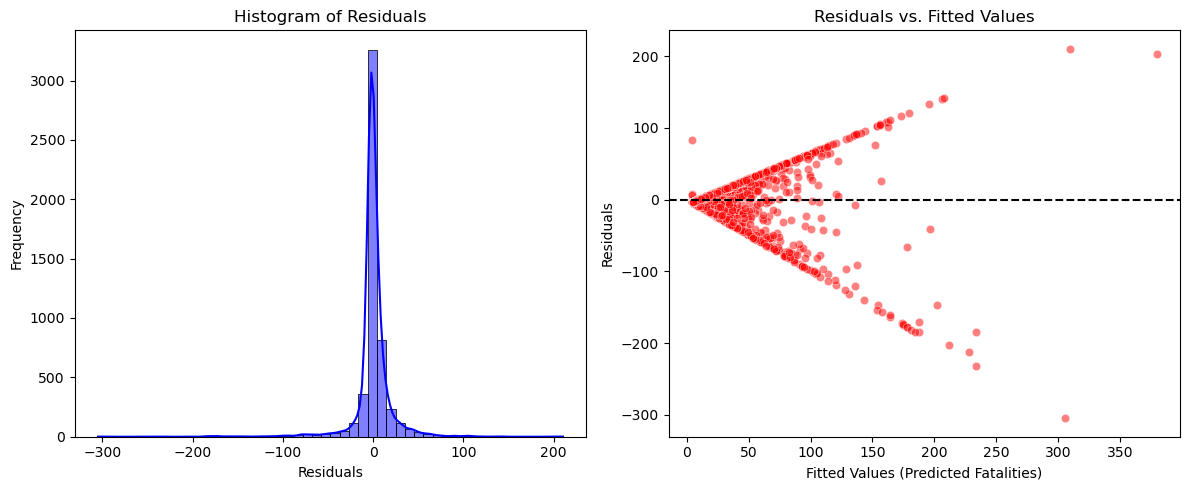

In [20]:
import statsmodels.api as sm

# Dropping rows with missing values in 'Aboard' and 'Fatalities' before regression
df_cleaned = df.dropna(subset=['Aboard', 'Fatalities'])

# Define the dependent variable (Fatalities) and explanatory variable (Aboard)
X = df_cleaned[['Aboard']]  # Explanatory variable
y = df_cleaned['Fatalities']  # Dependent variable

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Display regression summary
print(model.summary())

# --------------------------- Residual Diagnostics ---------------------------

# Compute residuals
df_cleaned['Residuals'] = model.resid

# Plot Residuals Histogram
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['Residuals'], bins=50, kde=True, color='blue', edgecolor='black')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")

# Residuals vs. Fitted Plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=model.fittedvalues, y=df_cleaned['Residuals'], alpha=0.5, color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Fitted Values (Predicted Fatalities)")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")

plt.tight_layout()
plt.show()

### **Regression Analysis: Fatalities vs. Number Aboard**

#### **Model Summary**
We performed an **Ordinary Least Squares (OLS) regression** to analyze the relationship between:
- **Dependent Variable (Y):** Number of Fatalities in a crash
- **Explanatory Variable (X):** Number of People Onboard the aircraft

---

#### **Key Regression Results**
| Metric | Value |
|---------|--------|
| **R-squared** | 0.573 |
| **Adjusted R-squared** | 0.573 |
| **F-statistic** | 7065 |
| **P-value (F-test)** | 0.000 |
| **Coefficient (Aboard)** | 0.5837 |
| **Standard Error (Aboard)** | 0.007 |
| **t-statistic (Aboard)** | 84.052 |
| **P-value (Aboard)** | 0.000 |

---

#### **Interpretation**
1. **Positive Relationship Between Aboard and Fatalities**
   - The coefficient **0.5837** suggests that for every additional person aboard, the expected number of fatalities increases by ~0.58
   - This confirms that **larger aircraft crashes tend to have higher fatalities**

2. **Strong Statistical Significance**
   - The **p-value (0.000)** for the `Aboard` variable indicates that the relationship is **highly statistically significant**
   - The **F-statistic (7065) with a p-value of 0.000** shows that the model has explanatory power

3. **Model Fit (R-squared = 0.573)**
   - **57.3% of the variability** in fatalities is explained by the number aboard
   - While this suggests a strong correlation, other factors such as crash severity, safety measures, emergency response also contribute

4. **Potential Issues**
   - **Skewness & Kurtosis:** The model residuals exhibit **high kurtosis (36.119)**, suggesting the presence of **outliers or non-normality**
   - **Heteroscedasticity:** Variance may not be constant, and transformations may be necessary

---

#### **Conclusion**
- The regression analysis confirms that **higher occupancy in an aircraft correlates with a higher number of fatalities**
- However, **correlation does not imply causation**—the severity of the crash, aircraft type, and safety measures play a role